In [87]:
import numpy as np
import numpy.linalg as la
import pandas as pd
import matplotlib.pyplot as plt
from EDMtoolkit import *

%load_ext autoreload
%autoreload 2
%matplotlib notebook

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
"""
Vision for this code: easy interface where I can see the timeseries length, species, and visualize the data
all very fast.

GOAL 1:
Print all species names w/ timeseries length and number of missing values

GOAL 2:
Produce plots for timeseries given species name?

"""

'\nVision for this code: easy interface where I can see the timeseries length, species, and visualize the data\nall very fast.\n\nGOAL 1:\nPrint all species names w/ timeseries length and number of missing values\n\nGOAL 2:\nProduce plots for timeseries given species name?\n\n'

In [3]:
fileMeta = "../Datasets/GPDD/data/df35b.234.1-DATA.csv"
fileTaxon = "../Datasets/GPDD/data/df35b.236.1-DATA.csv"
fileData = "../Datasets/GPDD/data/df35b.233.1-DATA.csv"
meta = pd.read_csv(fileMeta,encoding="utf-8",na_filter=False)
taxon = pd.read_csv(fileTaxon,encoding="unicode_escape",na_filter=True)
data = pd.read_csv(fileData,encoding="unicode_escape",na_filter=True)

meta.sort_values("DatasetLength", inplace=True, ascending=False)

pd.option_context("display.max_rows","display.max_columns")

# data.drop(["Level"],1,inplace=True)
# data.set_index(["Site","Month","Year"],inplace=True)
# display(data.query("Site == ['Lake Apopka (FL)'] and "))

"""
for site in data["Site"].drop_duplicates():
    for species in data.query("Site == ['{s}']".format(s=site))["Name"].drop_duplicates():
        s = data.query("Site == ['{s}'] and Name == ['{n}']".format(s=site,n=species))
        print("len = {le}, NAs = {nas} : {l} population of {s} ".format(s=species,l=site, le=len(s), nas=s["Abundance"].isna().sum()) )
"""
# Lake Geneva has alot of data points, some NAs, is not restricted use, but has crap temperature data
# Esthwaite Water Zooplankton has almost 0 NAs, good temp data, is of reasonable size, and is not restricted use - BINGO

'\nfor site in data["Site"].drop_duplicates():\n    for species in data.query("Site == [\'{s}\']".format(s=site))["Name"].drop_duplicates():\n        s = data.query("Site == [\'{s}\'] and Name == [\'{n}\']".format(s=site,n=species))\n        print("len = {le}, NAs = {nas} : {l} population of {s} ".format(s=species,l=site, le=len(s), nas=s["Abundance"].isna().sum()) )\n'

In [4]:
for i in meta["MainID"]:    
    piss = int(meta.query(f"MainID == {i}")["DatasetLength"])
    tid = int(meta.query(f"MainID == {i}")["TaxonID"])
    name = taxon.query(f"TaxonID == {tid}")["CommonName"].iloc[0]
    
    y1 = int(meta.query(f"MainID == {i}")["StartYear"])
    y2 = int(meta.query(f"MainID == {i}")["EndYear"])
    
    print(f"{piss}, {name}, ({y1}-{y2}) [{i}]")
    

1007, Leafhopper, (1974-1994) [8862]
939, Cuban cockroach, (1974-1994) [8720]
920, Unknown, (1974-1994) [8939]
901, Unknown, (1974-1994) [9094]
866, None, (1974-1994) [8887]
840, Unknown, (1974-1994) [8779]
805, Mole crickets or Tree crickets
                             crickets, swierszcze, (1976-1994) [9143]
794, Unknown, (1974-1994) [8792]
759, Bush cricket or Long-horned katydid, (1974-1994) [9112]
747, Praying mantid, (1974-1994) [9114]
734, None, (1978-1994) [8886]
712, None, (1974-1994) [8984]
710, Unknown, (1974-1994) [8662]
693, Unknown, (1974-1994) [8738]
682, None, (1974-1994) [8976]
664, Unknown, (1974-1994) [8747]
650, Unknown, (1974-1994) [8804]
643, Froghopper, (1974-1994) [8780]
633, None, (1974-1994) [8883]
626, Bush cricket or Long-horned katydid, (1977-1994) [9152]
616, Bug, (1974-1994) [9052]
615, Unknown, (1974-1994) [8807]
611, Bush cricket or Long-horned katydid, (1977-1994) [9161]
609, Bush cricket or Long-horned katydid, (1974-1994) [9106]
588, Unknown, (1974-

286, Rose grain aphid, (1969-1990) [8217]
286, Violet aphid or ornate aphid, (1969-1990) [8402]
286, Prune aphid, (1969-1990) [8395]
286, Unknown, (1969-1990) [8216]
286, Potato aphid, (1969-1990) [8215]
286, Currant-Sowthistle aphid, (1969-1990) [8214]
286, Prune aphid, (1969-1990) [8213]
286, Aphid, (1969-1990) [8212]
286, Spruce aphid, (1969-1990) [8211]
286, Sycamore aphid, (1969-1990) [8210]
286, Aphid, (1969-1990) [8209]
286, Willow-carrot aphid, (1969-1990) [8208]
286, Currant-Sowthistle aphid, (1969-1990) [8396]
286, Cabbage aphid, (1969-1990) [8207]
286, Potato aphid, (1969-1990) [8397]
286, Leaf curling aphid, (1969-1990) [8206]
286, Peach-potato aphid, (1969-1990) [8403]
286, Hop aphid, (1969-1990) [8226]
286, Apple grass aphid, (1969-1990) [8227]
286, Willow-carrot aphid, (1969-1990) [8269]
286, Corn leaf aphid, (1969-1990) [8469]
286, Corn leaf aphid, (1969-1990) [8409]
286, Apple grass aphid, (1969-1990) [8408]
286, Hop aphid, (1969-1990) [8407]
286, Oat aphid, (1969-1990

260, Sycamore aphid, (1971-1990) [8153]
260, Prune aphid, (1971-1990) [8425]
260, Currant-Sowthistle aphid, (1971-1990) [8426]
260, Sycamore aphid, (1971-1990) [8421]
260, Leaf curling aphid, (1969-1988) [8297]
260, Pea aphid, (1969-1988) [8293]
260, Potato aphid, (1971-1990) [8427]
260, Leaf curling aphid, (1971-1990) [8149]
260, Aphid, (1969-1990) [8382]
260, Violet aphid or ornate aphid, (1969-1988) [8372]
260, Prune aphid, (1971-1990) [8156]
260, Aphid, (1969-1988) [8300]
260, Willow-carrot aphid, (1969-1988) [8359]
260, Rosy apple aphid, (1969-1988) [8362]
260, Aphid, (1971-1990) [8415]
260, Sycamore aphid, (1969-1988) [8361]
260, Bean aphid, (1971-1990) [8414]
260, Pea aphid, (1971-1990) [8413]
260, Aphid, (1969-1988) [8360]
260, Cabbage aphid, (1969-1988) [8358]
260, Rose grain aphid, (1971-1990) [8160]
260, Leaf curling aphid, (1969-1988) [8357]
260, Unknown, (1971-1990) [8161]
260, Foxglove aphid, (1969-1988) [8356]
260, Aphid, (1969-1988) [8355]
260, Bean aphid, (1969-1988) [

195, Unknown, (1974-1993) [8948]
194, None, (1974-1993) [8664]
194, Hooknose or Pogge, (1981-1997) [6788]
194, None, (1990-1994) [8723]
190, Unknown, (1977-1993) [8822]
190, Unknown, (1974-1993) [9117]
190, None, (1974-1994) [8912]
189, None, (1974-1994) [8905]
187, None, (1974-1993) [9078]
186, Bush cricket or Long-horned katydid, (1975-1994) [9101]
184, None, (1977-1994) [8893]
182, Unknown, (1974-1994) [9005]
181, None, (1975-1994) [8716]
180, None, (1975-1994) [8855]
178, Bush cricket or Long-horned katydid, (1977-1994) [9154]
177, None, (1974-1993) [9972]
177, Unknown, (1974-1993) [8781]
177, Unknown, (1974-1992) [8946]
177, None, (1979-1994) [8923]
176, Bank vole, (1972-1986) [10105]
175, Unknown, (1974-1994) [8950]
175, Bank vole, (1972-1986) [10104]
174, Unknown, (1974-1993) [9061]
173, Bush cricket or Long-horned katydid, (1974-1988) [9110]
173, Bank vole, (1966-1980) [10167]
170, Unknown, (1977-1994) [8827]
170, Drummer, (1974-1993) [8732]
169, Sycamore aphid, (1971-1990) [82

119, Sharpshooter, (1974-1993) [8799]
119, Canadian lynx, (1821-1939) [9376]
119, Unknown, (1974-1993) [9047]
118, Unknown, (1974-1993) [8960]
118, Pink spotted hawk-moth, (1977-1993) [8821]
117, Mute swan, (1823-1939) [20581]
117, Snowshoe hare or American varying hare, (1788-1904) [9713]
115, Unknown, (1977-1994) [8814]
114, Canadian lynx, (1821-1934) [9371]
114, Canadian lynx, (1821-1934) [9373]
114, Common eider, (1955-1965) [6635]
114, Canadian lynx, (1821-1934) [9372]
113, Unknown, (1977-1993) [8754]
113, None, (1979-1993) [8925]
113, Unknown, (1974-1991) [8962]
113, Canadian lynx, (1821-1933) [9375]
113, Canadian lynx, (1821-1933) [20549]
112, Desert locust, (1861-1972) [10001]
111, Atlantic salmon, (1876-1986) [19]
110, Canadian lynx, (1825-1934) [9370]
110, North American deer, (1763-1872) [9734]
109, Bush cricket or Long-horned katydid, (1977-1993) [9122]
109, Bug, (1974-1994) [9066]
109, None, (1974-1993) [8700]
108, Red grouse, (1871-1978) [10127]
106, Unknown, (1974-1993) 

63, Arctic fox, (1919-1981) [308]
63, Brown bear, (1919-1981) [134]
63, Polar bear, (1919-1981) [139]
63, Brown bear, (1919-1981) [135]
63, Polar bear, (1919-1981) [138]
63, Unknown, (1977-1993) [8837]
63, Cougar or Mountain lion, (1919-1981) [498]
63, Brown bear, (1919-1981) [137]
63, Fisher or  Pekan, (1919-1981) [284]
63, Fisher or  Pekan, (1919-1981) [282]
63, Fisher or  Pekan, (1919-1981) [281]
63, Fisher or  Pekan, (1919-1981) [280]
63, Fisher or  Pekan, (1919-1981) [285]
63, Beaver, (1919-1981) [151]
63, Fisher or  Pekan, (1919-1981) [279]
63, Beaver, (1919-1981) [152]
63, Beaver, (1919-1981) [149]
63, Fisher or  Pekan, (1919-1981) [286]
63, Bank vole, (1971-1993) [10129]
63, Fisher or  Pekan, (1919-1981) [288]
63, Yellow necked mouse, (1971-1991) [10130]
63, Beaver, (1919-1981) [153]
63, Arctic fox, (1919-1981) [306]
63, Beaver, (1919-1981) [154]
63, Beaver, (1919-1981) [147]
63, Fisher or  Pekan, (1919-1981) [283]
62, American red fox, (1920-1981) [348]
62, None, (1975-1993) [

50, North American mink, (1931-1980) [495]
50, Downy woodpecker, (1927-1976) [1157]
50, Scarlet tiger moth, (1939-1988) [9193]
50, Hairy woodpecker, (1927-1976) [1156]
50, Yellow billed cuckoo, (1927-1976) [1150]
50, Common flicker, (1927-1976) [1153]
50, Indigo bunting, (1927-1976) [1170]
50, Red-bellied woodpecker, (1927-1976) [1154]
50, Scarlet tiger moth, (1939-1988) [9192]
50, Cardinal, (1927-1976) [1169]
50, Sockeye salmon, (1921-1970) [1971]
50, Scarlet tiger moth, (1939-1988) [9191]
50, Red-headed woodpecker, (1927-1976) [1155]
50, Red-tailed hawk, (1906-1955) [5039]
50, Common crow or American crow, (1927-1976) [1161]
50, Great crested flycatcher, (1927-1976) [1158]
50, Eastern wood-pewee, (1927-1976) [1159]
50, House wren, (1927-1976) [1163]
49, Rough-legged hawk (buzzard), (1907-1955) [5044]
49, Bobcat, (1933-1981) [241]
49, Pink salmon, (1911-1959) [1859]
49, None, (1978-1993) [9068]
49, Unknown, (1974-1993) [8810]
49, Red-shouldered hawk or Buzzard, (1907-1955) [5043]
49, 

43, Dungeness crab, (1950-1992) [2742]
43, Virginia opossum, (1849-1891) [9737]
43, Dungeness crab, (1950-1992) [2744]
43, Beaver, (1939-1981) [164]
43, Dungeness crab, (1950-1992) [2745]
43, Dungeness crab, (1950-1992) [2746]
43, Dungeness crab, (1950-1992) [2747]
43, Dungeness crab, (1950-1992) [2748]
43, Dungeness crab, (1950-1992) [2749]
43, Dungeness crab, (1950-1992) [2750]
43, Dungeness crab, (1950-1992) [2751]
43, Heron, (1928-1970) [20531]
43, Dungeness crab, (1950-1992) [2752]
43, Coyote or  Prarie wolf, (1939-1981) [270]
43, Coyote or  Prarie wolf, (1939-1981) [274]
43, Atlantic salmon, (1947-1989) [1618]
43, None, (1974-1991) [8713]
43, Grey heron, (1928-1970) [10139]
43, Bobcat, (1939-1981) [229]
42, Coyote or  Prarie wolf, (1940-1981) [258]
42, Bush cricket or Long-horned katydid, (1974-1991) [9108]
42, Coyote or  Prarie wolf, (1940-1981) [254]
42, Coyote or  Prarie wolf, (1940-1981) [268]
42, Weasel, (1912-1953) [10108]
42, American red fox, (1940-1981) [360]
42, Bobcat,

34, Beaver, (1948-1981) [168]
34, Cod, (1956-1989) [1677]
34, European rabbit, (1944-1977) [7100]
34, Brown hare or European hare, (1944-1977) [7101]
34, Bush cricket or Long-horned katydid, (1982-1994) [9177]
34, Nightingale, (1927-1960) [2772]
33, American red fox, (1949-1981) [374]
33, Beaver, (1949-1981) [160]
33, Saithe, (1960-1992) [1904]
33, American red fox, (1949-1981) [371]
33, Gypsy moth, (-9999--9999) [9646]
33, Beaver, (1949-1981) [180]
33, American red fox, (1949-1981) [392]
33, Beaver, (1949-1981) [171]
33, Silver hake, (1955-1987) [1961]
33, North American mink, (1949-1981) [462]
33, North American mink, (1949-1981) [464]
33, Silver hake, (1955-1987) [1962]
33, White rhino, (1962-1994) [20574]
33, Sockeye salmon, (1956-1988) [1970]
33, Dungeness crab, (1945-1977) [10036]
33, Sockeye salmon, (1962-1994) [1986]
33, Sockeye salmon, (1956-1988) [2025]
33, Northern elephant seal, (1964-1996) [20573]
33, Viburnum whitefly, (1963-1995) [20625]
33, African rat, (1991-1996) [998

28, Black grouse, (1897-1924) [1366]
28, Amphipods, (1948-1975) [9785]
28, Red grouse, (1897-1924) [1365]
28, Zooplankton, (1948-1975) [9771]
28, Zooplankton, (1948-1975) [9772]
27, Long-tailed tit, (1949-1975) [1232]
27, Willow tit, (1949-1975) [1231]
27, Beaver, (1955-1981) [173]
27, Pink salmon, (1960-1986) [1865]
27, Pink salmon, (1945-1971) [1826]
27, Marsh tit, (1949-1975) [1230]
27, Nuthatch, (1949-1975) [1233]
27, Carrion crow, (1949-1975) [1224]
27, Sharp-tailed and Pinnated grouse (Greater Prairie Chicken), (1931-1957) [9474]
27, Snowshoe hare or American varying hare, (1931-1957) [1534]
27, Grey partridge, (1932-1958) [9482]
27, Coal tit, (1949-1975) [1229]
27, Ruffed grouse, (1931-1957) [1535]
27, Carabid, (1959-1985) [9188]
27, Carabid, (1959-1985) [9189]
27, Beaver, (1955-1981) [194]
27, Great tit, (1949-1975) [1227]
27, Magpie, (1949-1975) [1225]
27, Treecreeper, (1949-1975) [1234]
27, Eurasian jay, (1949-1975) [1226]
27, Small rivulet, (1967-1993) [1127]
27, Chiffchaff,

26, Eurasian perch, (1941-1966) [6097]
26, Eurasian perch, (1941-1966) [6099]
26, Wasp, (-9999--9999) [9638]
26, Blue tit, (1950-1975) [1228]
26, Ruffed grouse, (1927-1952) [1536]
26, Snowshoe hare or American varying hare, (1910-1935) [10125]
26, Hedge sparrow or Dunnock, (1950-1975) [1244]
26, Wasp, (1921-1946) [10138]
26, Codling moth, (-9999--9999) [9657]
26, Cape warthog, Somali warthog or Desert warthog, (1959-1984) [7081]
26, Baboon, (1959-1984) [7080]
26, Bohor reedbuck, (1959-1984) [7079]
26, Harnessed Antelope or Bushbuck, (1959-1984) [7078]
26, Waterbuck, (1959-1984) [7077]
26, Blue Wildebeest, (1959-1984) [7076]
26, Giraffe, (1959-1984) [7075]
26, Black rhinoceros, (1959-1984) [7074]
26, Impala, (1959-1984) [7073]
26, Burchell's zebra, (1959-1984) [7072]
26, Hippopotamus, (1959-1984) [7071]
26, African buffalo, Cape buffalo or Bushcow, (1959-1984) [7070]
26, African elephant, (1959-1984) [7069]
26, Flea beetle, (-9999--9999) [9655]
26, Cabbage root fly or maggot, (-9999--99

24, North American mink, (1956-1979) [454]
24, Atlantic herring, (1967-1990) [1743]
24, Atlantic herring, (1947-1970) [1765]
24, Field sparrow, (1946-1969) [1207]
24, Canadian lynx, (1955-1978) [419]
24, Pink salmon, (1960-1983) [1830]
24, Mountain hare or Varying hare, (1916-1939) [1342]
23, Reindeer or Caribou, (1968-1990) [10051]
23, Sockeye salmon, (1961-1983) [1966]
23, Blue tit, (1961-1983) [6531]
23, Cod, (1970-1992) [1689]
23, Silver, (1967-1989) [10142]
23, Unknown, (1975-1993) [9092]
23, Reindeer or Caribou, (1968-1990) [10050]
23, Cod, (1970-1992) [1690]
23, Bobcat, (1933-1955) [210]
23, Silver, (1967-1989) [10096]
23, Plaice, (1968-1990) [1900]
23, Silver, (1967-1989) [10141]
23, Grey wolf or Timber wolf, (1932-1954) [10122]
23, North American mink, (1940-1962) [475]
23, Pink salmon, (1961-1983) [1884]
23, Atlantic herring, (1967-1989) [1762]
23, Western capercaillie or Wood grouse, (1945-1967) [10069]
23, Canadian lynx, (1932-1954) [10111]
23, Sockeye salmon, (1969-1991) [

20, Wheat blossom midge, (1927-1946) [1524]
20, Snowshoe hare or American varying hare, (1932-1951) [9486]
20, Atlantic herring, (1970-1989) [1760]
20, Ruffed grouse, (1939-1958) [9466]
20, Chub mackerel, (1951-1970) [1674]
20, Cod, (1974-1993) [1682]
20, Willow warbler, (1976-1995) [1491]
20, Blackcap, (1976-1995) [1489]
20, Willow warbler, (1976-1995) [1471]
20, Larch budmoth, (-9999--9999) [9639]
20, Spotted flycatcher, (1976-1995) [1472]
20, Starling, (1976-1995) [1473]
20, Yellowhammer, (1976-1995) [1474]
20, Pine looper or Bordered white, (1950-1969) [10120]
20, Muskrat, (1919-1938) [9216]
20, Muskrat, (1919-1938) [9217]
20, Sandhill crane, (1959-1978) [9990]
20, Magpie, (1976-1995) [1426]
20, Muskrat, (1919-1938) [9220]
20, Muskrat, (1919-1938) [9221]
20, Wren, (1976-1995) [1488]
20, Muskrat, (1919-1938) [9222]
20, Muskrat, (1919-1938) [9223]
20, Eurasian collared-dove, (1976-1995) [1485]
20, Muskrat, (1919-1938) [9224]
20, Muskrat, (1919-1938) [9225]
20, Magpie, (1976-1995) [14

18, Common rosefinch, (1960-1977) [9885]
18, Bullfinch, (1960-1977) [9886]
18, Blackcap, (1960-1977) [9876]
18, Icterine warbler, (1960-1977) [9872]
18, Thrush nightingale, (1960-1977) [9865]
18, Striped marlin, (1952-1969) [9837]
18, Robin, (1960-1977) [9864]
18, Hedge sparrow or Dunnock, (1960-1977) [9863]
18, Wren, (1960-1977) [9862]
18, Pied wagtail, (1960-1977) [9861]
18, Common redstart, (1960-1977) [9866]
18, Painted turtle, (1975-1992) [20586]
18, Snapping turtle, (1975-1992) [20585]
18, None, (1980-1993) [8967]
18, Blandings turtle, (1975-1992) [20584]
18, Yellow wagtail, (1960-1977) [9860]
18, Meadow pipit, (1960-1977) [9859]
18, Sockeye salmon, (1968-1985) [2011]
18, Tree pipit, (1960-1977) [9858]
18, Blackbird, (1960-1977) [9867]
18, None, (1976-1993) [8864]
18, Song thrush, (1960-1977) [9868]
18, Redwing, (1960-1977) [9869]
18, Unknown, (1977-1992) [8846]
18, Sedge warbler, (1960-1977) [9870]
18, House martin, (1960-1977) [9857]
18, Rock ptarmigan, (1946-1963) [2733]
18, S

17, Plain clay, (1968-1984) [6225]
17, Pebble hook-tip, (1968-1984) [6177]
17, Dusky-lemon sallow, (1968-1984) [6342]
17, Flame shoulder, (1968-1984) [6224]
17, Centre-barred sallow, (1968-1984) [6341]
17, Marbled white spot, (1968-1984) [6340]
17, Sallow, (1968-1984) [6339]
17, Brown-spot pinion, (1968-1984) [6338]
17, Flounced chestnut, (1968-1984) [6337]
17, Lunar underwing, (1968-1984) [6336]
17, The suspected, (1968-1984) [6335]
17, Six-striped rustic, (1968-1984) [6223]
17, Brown scallop, (1968-1984) [6429]
17, Beaded chestnut, (1968-1984) [6334]
17, Dotted clay, (1968-1984) [6222]
17, Small square-spot, (1968-1984) [6221]
17, Satellite, (1968-1984) [6333]
17, Common carpet, (1968-1984) [6430]
17, Juniper carpet, (1968-1984) [6431]
17, Feathered ranunculus, (1968-1984) [6332]
17, Least black arches, (1968-1984) [6178]
17, Pale shining brown, (1968-1984) [6246]
17, Bank vole, (1972-1988) [6716]
17, Grey-sided vole, red-grey vole, (1972-1988) [6718]
17, Sandy carpet, (1968-1984) [6

17, Wood carpet, (1968-1984) [6441]
17, Treble-bar, (1968-1984) [6442]
17, Lesser treble-bar, (1968-1984) [6443]
17, Early tooth-striped, (1968-1984) [6444]
17, The mallow, (1968-1984) [6445]
17, Small waved umber, (1968-1984) [6446]
17, John Dory, (1977-1993) [6563]
17, Oblique carpet, (1968-1984) [6447]
17, Dark spinach, (1968-1984) [6448]
17, Lead belle, (1968-1984) [6450]
17, Scallop shell, (1968-1984) [6438]
17, Winter moth, (1968-1984) [6451]
17, Rosy footman, (1968-1984) [6187]
17, July belle, (1968-1984) [6453]
17, Northern winter moth, (1968-1984) [6454]
17, Yellow-barred brindle, (1968-1984) [6455]
17, Round-winged muslin, (1968-1984) [6184]
17, Shaded broad-bar, (1968-1984) [6456]
17, Small white wave, (1968-1984) [6457]
17, Small yellow wave, (1968-1984) [6458]
17, Clouded border, (1968-1984) [6459]
17, Brom-tip, (1968-1984) [6439]
17, May highflyer, (1968-1984) [6437]
17, Dingy shell, (1968-1984) [6461]
17, Olive, (1968-1984) [6308]
17, Turnip moth, (1968-1984) [6215]
17, 

15, Cabbage aphid, (-9999--9999) [9653]
15, Sardine, (1976-1990) [1941]
15, Spotted flycatcher, (1981-1995) [1281]
15, Red grouse, (1977-1991) [9911]
15, Redpoll, (1981-1995) [1283]
15, Wren, (1981-1995) [1293]
15, Hedge sparrow or Dunnock, (1981-1995) [1294]
15, Wild boar, (1968-1982) [9428]
15, Blackcap, (1981-1995) [1296]
15, Great tit, (1964-1978) [9206]
15, Spring usher, (1952-1966) [1310]
15, Unknown, (1952-1966) [1311]
15, Mottled umber, (1952-1966) [1312]
15, Scarce umber, (1952-1966) [1313]
15, None, (1976-1990) [8854]
15, Bay checkerspot butterfly, (1960-1974) [9237]
15, Atlantic herring, (1973-1987) [1744]
15, Atlantic herring, (1973-1987) [1745]
15, Bay checkerspot butterfly, (1960-1974) [9238]
15, Unknown, (1978-1986) [8849]
15, None, (1977-1992) [8848]
15, Bay checkerspot butterfly, (1960-1974) [9239]
15, Pine carpet, (-9999--9999) [9635]
15, Northern shrimp, (1966-1980) [6783]
15, Chaffinch, (1981-1995) [1282]
15, Robin, (1981-1995) [1295]
15, Chiffchaff, (1981-1995) [12

13, South American rush, (1985-1997) [6605]
13, Whitethroat, (1983-1995) [1288]
13, Bush cricket or Long-horned katydid, (1977-1988) [9164]
13, Lesser whitethroat, (1983-1995) [1290]
13, Pale clouded yellow, (1983-1995) [9742]
13, Red-backed vole, (1955-1967) [6755]
13, Meadow vole, (1955-1967) [6754]
13, Deer mouse, (1955-1967) [6753]
13, Red-backed vole, (1955-1967) [6752]
13, Cinereus shrew, (1955-1967) [6751]
13, Eastern chipmunk, (1955-1967) [6750]
13, Meadow vole, (1955-1967) [6749]
13, Deer mouse, (1955-1967) [6748]
13, Red-backed vole, (1955-1967) [6747]
13, White stork, (1931-1943) [1406]
13, Humming-bird hawkmoth, (1983-1995) [9747]
13, Linnet, (1983-1995) [1291]
13, Pearly underwing or Variegated cutworm, (1983-1995) [9749]
13, Rush veneer, (1983-1995) [9751]
13, Rusty-dot pearl, (1983-1995) [9752]
13, Queen of Spain fritillary, (1984-1996) [9753]
13, Willowherb hawkmoth, (1983-1995) [9756]
13, L-album wainscot, (1983-1995) [9759]
13, Silver, (1984-1996) [9765]
13, Trowbridg

12, Grey fox, (1970-1981) [344]
12, Leafhopper, (1972-1977) [9285]
12, Swallowtail, (-9999--9999) [9619]
12, Swallowtail, (-9999--9999) [9618]
12, Swallowtail, (-9999--9999) [9617]
12, Swallowtail, (-9999--9999) [9616]
12, American black bear, (1970-1981) [110]
12, American black bear, (1970-1981) [124]
12, Sawfly, (-9999--9999) [9564]
12, Walleye pollock, (1970-1981) [2075]
12, Unknown, (1926-1937) [1527]
12, Flounced rustic, (1968-1979) [5016]
12, None, (1984-1993) [9034]
12, Rook, (1933-1944) [6101]
12, Japanese macaque or Japanese monkey, (1960-1971) [6064]
12, Robin, (1984-1995) [1301]
12, Atlantic herring, (1969-1980) [6781]
12, Atlantic herring, (1969-1980) [6780]
12, White-toothed shrew, (1977-1988) [20576]
12, Atlantic herring, (1969-1980) [6779]
12, Unknown, (1926-1937) [1528]
12, Atlantic herring, (1969-1980) [6776]
12, Blackbird, (1984-1995) [1302]
12, Garden warbler, (1984-1995) [1303]
12, Ruffed grouse, (1947-1958) [9467]
12, Blackcap, (1984-1995) [1304]
12, Common eider,

10, Painted lady, (1976-1985) [3544]
10, Small tortoiseshell, (1976-1985) [3545]
10, Peacock, (1976-1985) [3546]
10, Speckled wood, (1976-1985) [3549]
10, Meadow brown, (1976-1985) [6667]
10, Grayling, (1976-1985) [6666]
10, Silver washed fritillary, (1976-1985) [6664]
10, Small tortoiseshell, (1976-1985) [6663]
10, Hedge brown, (1976-1985) [3526]
10, Small copper, (1976-1985) [6661]
10, Comma, (1976-1985) [3548]
10, Meadow brown, (1976-1985) [3527]
10, Grizzled skipper, (1976-1985) [3353]
10, Wall, (1976-1985) [3525]
10, Comma, (1976-1985) [3523]
10, Comma, (1976-1985) [3452]
10, Desert pocket mouse, (1978-1987) [1394]
10, Speckled wood, (1976-1985) [3454]
10, Wall, (1976-1985) [3455]
10, Hedge brown, (1976-1985) [3458]
10, Meadow brown, (1976-1985) [3459]
10, Small heath, (1976-1985) [3460]
10, Ringlet, (1976-1985) [3461]
10, Small skipper, (1976-1985) [3462]
10, Dingy skipper, (1976-1985) [3464]
10, Brimstone, (1976-1985) [3466]
10, Large white, (1976-1985) [3468]
10, Small white, (

10, Grayling, (1976-1985) [3616]
10, Hedge brown, (1976-1985) [3617]
10, Meadow brown, (1976-1985) [3618]
10, Small heath, (1976-1985) [3619]
10, Dallisgrass, (1978-1987) [6636]
10, Peacock, (1978-1987) [1276]
10, Ringlet, (1976-1985) [3620]
10, Large skipper, (1976-1985) [3621]
10, Brimstone, (1976-1985) [3623]
10, Green-veined white, (1978-1987) [1258]
10, Dark green fritillary, (1978-1987) [1256]
10, Small skipper, (1976-1985) [3733]
10, Small white, (1976-1985) [3708]
10, Peacock, (1976-1985) [3688]
10, Comma, (1976-1985) [3690]
10, Dark green fritillary, (1976-1985) [3691]
10, Speckled wood, (1976-1985) [3692]
10, Wall, (1976-1985) [3693]
10, Grayling, (1976-1985) [3695]
10, Marbled white, (1976-1985) [3696]
10, Hedge brown, (1976-1985) [3697]
10, Meadow brown, (1976-1985) [3698]
10, Small heath, (1976-1985) [3699]
10, Small skipper, (1976-1985) [3701]
10, Large white, (1976-1985) [3706]
10, Green-veined white, (1976-1985) [3710]
10, Common blue, (1978-1987) [1254]
10, Green-veine

10, Small copper, (1976-1985) [2798]
10, Green-veined white, (1976-1985) [2836]
10, Orange tip, (1976-1985) [2837]
10, Green hairstreak, (1976-1985) [2838]
10, Red pine cone beetle, (1969-1978) [9228]
10, Painted lady, (1976-1985) [2885]
10, Small tortoiseshell, (1976-1985) [2886]
10, Peacock, (1976-1985) [2887]
10, Comma, (1976-1985) [2889]
10, Speckled wood, (1976-1985) [2890]
10, Wall, (1976-1985) [2891]
10, Hedge brown, (1976-1985) [2893]
10, Meadow brown, (1976-1985) [2894]
10, Small heath, (1976-1985) [2895]
10, Ringlet, (1976-1985) [2896]
10, Small skipper, (1976-1985) [2897]
10, Large skipper, (1976-1985) [2898]
10, Brimstone, (1976-1985) [2901]
10, Unknown, (1975-1987) [8873]
10, Pasture porina, (1974-1983) [9231]
10, Large white, (1976-1985) [2903]
10, Small white, (1976-1985) [2905]
10, Green-veined white, (1976-1985) [2907]
10, Green-veined white, (1976-1985) [2908]
10, Rock ptarmigan, (1960-1969) [9240]
10, Willow grouse, (1960-1969) [9241]
10, Atlantic salmon, (1966-1975)

10, Silver spotted skipper, (1976-1985) [3421]
10, Green-veined white, (1976-1985) [3163]
10, Meadow brown, (1976-1985) [3416]
10, Orange tip, (1976-1985) [3165]
10, Brimstone, (1976-1985) [3190]
10, Common blue, (1976-1985) [3170]
10, Grey partridge, (1949-1958) [9481]
10, Green-veined white, (1976-1985) [3193]
10, Purple hairstreak, (1976-1985) [3194]
10, Red admiral, (1976-1985) [3200]
10, Pied flycatcher, (1941-1950) [1533]
10, Small tortoiseshell, (1976-1985) [3202]
10, Peacock, (1976-1985) [3204]
10, Speckled wood, (1976-1985) [3207]
10, Hedge brown, (1976-1985) [3210]
10, Meadow brown, (1976-1985) [3211]
10, Large skipper, (1976-1985) [3212]
10, Brimstone, (1976-1985) [3214]
10, Large white, (1976-1985) [3216]
10, Hedge brown, (1976-1985) [3415]
10, Small white, (1976-1985) [3218]
10, Green-veined white, (1976-1985) [3220]
10, Green-veined white, (1976-1985) [3221]
10, Speckled wood, (1976-1985) [3412]
10, Orange tip, (1976-1985) [3222]
10, Small copper, (1976-1985) [3223]
10, C

In [5]:
def getTimeSeries(t):
    return data.query(f"MainID == {t}")["Population"].to_numpy()


<IPython.core.display.Javascript object>


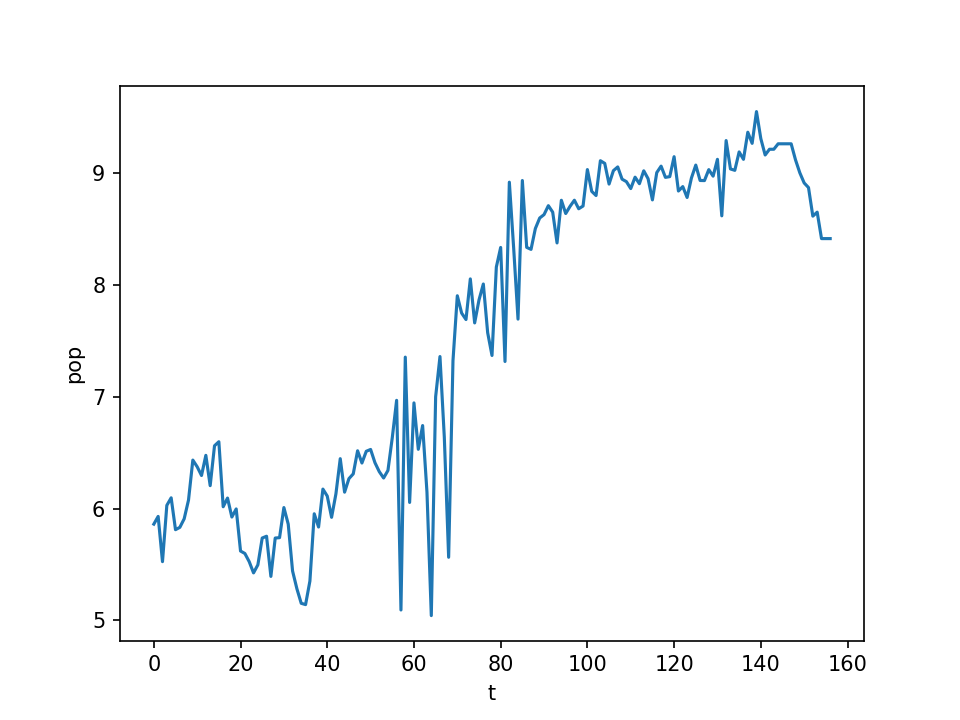

<IPython.core.display.Javascript object>


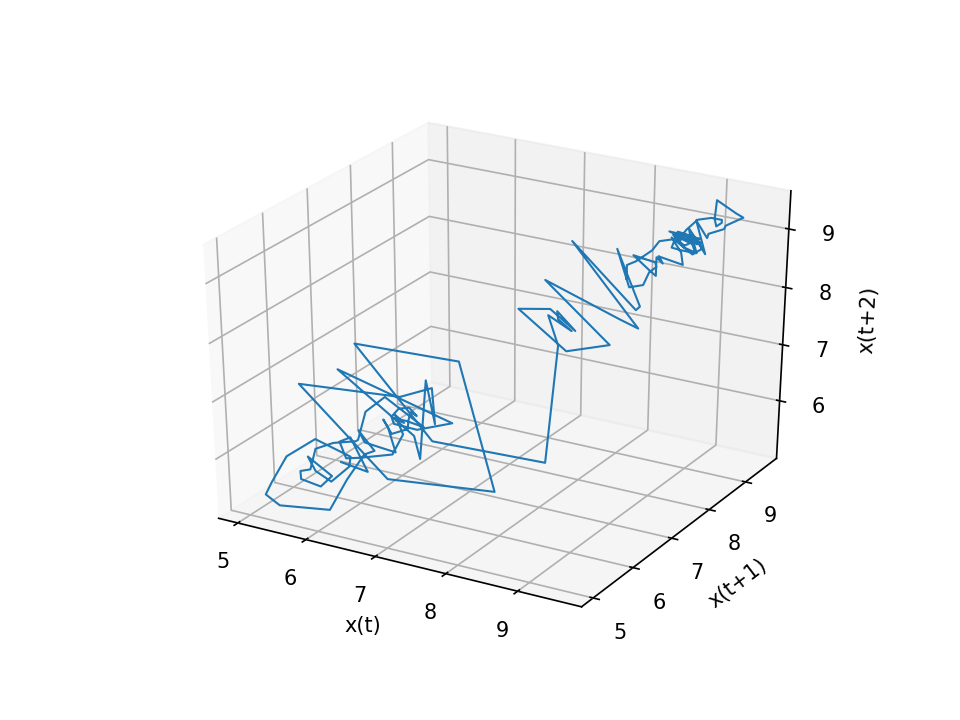

<IPython.core.display.Javascript object>


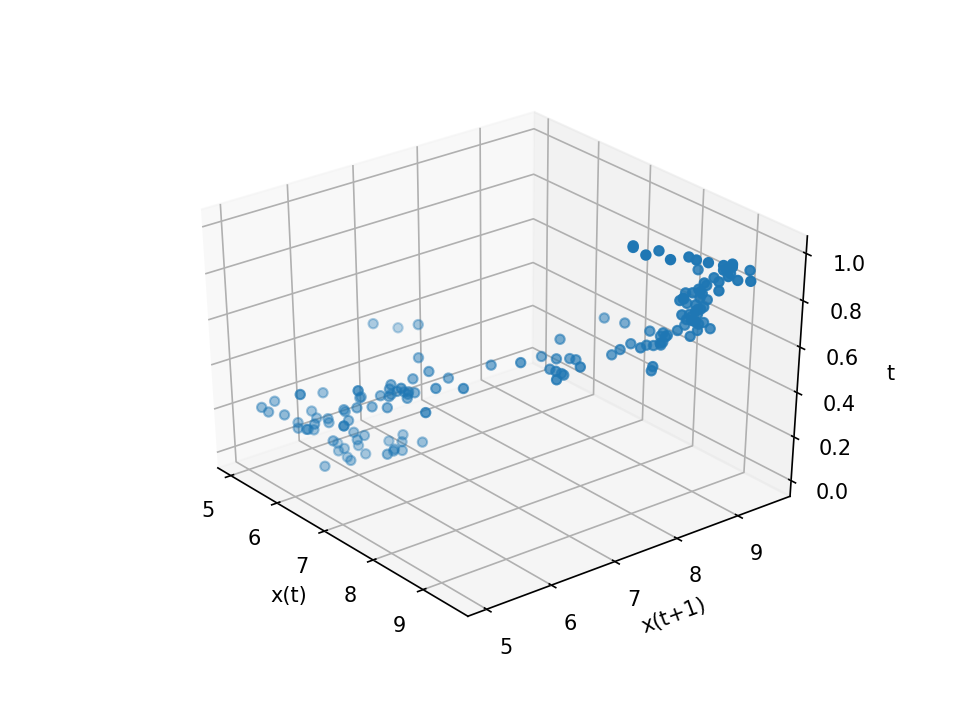

<IPython.core.display.Javascript object>


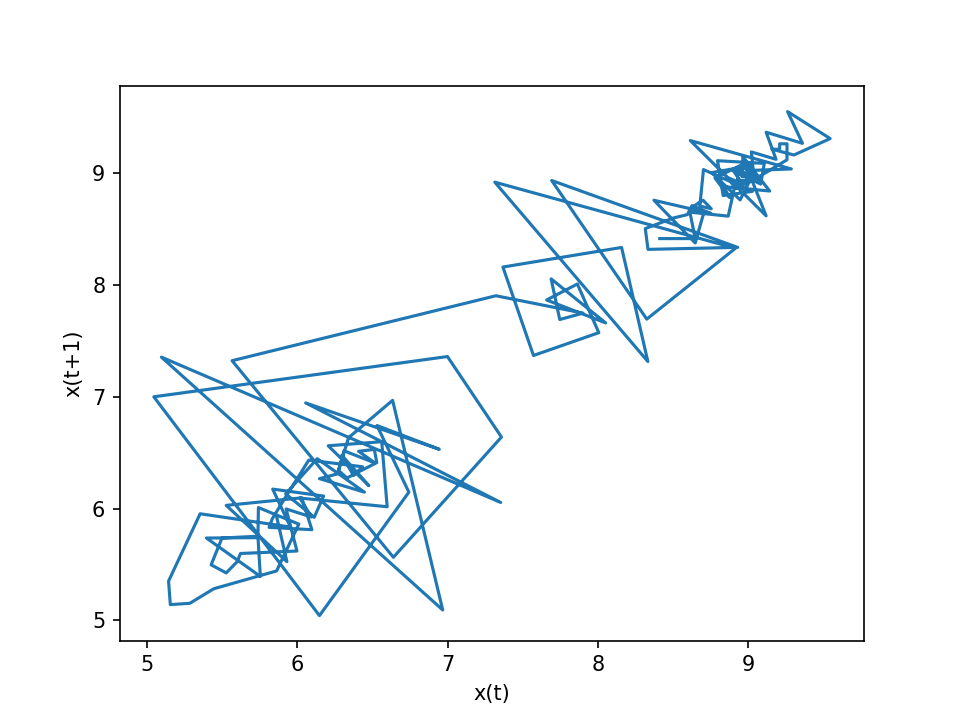

In [210]:
s = getTimeSeries(9707)
s = np.log(s+1)

plotTS(s)
poincare3d(s)
poincareT(s)
poincare2d(s)

In [64]:
# s = np.array([1,2,3,4,5,6,7,8,9,10,0])

In [167]:
X, Y, tx, ty = delayEmbed(s, 3, 0, 1, t = np.linspace(0,1,num=s.shape[0]))

<IPython.core.display.Javascript object>


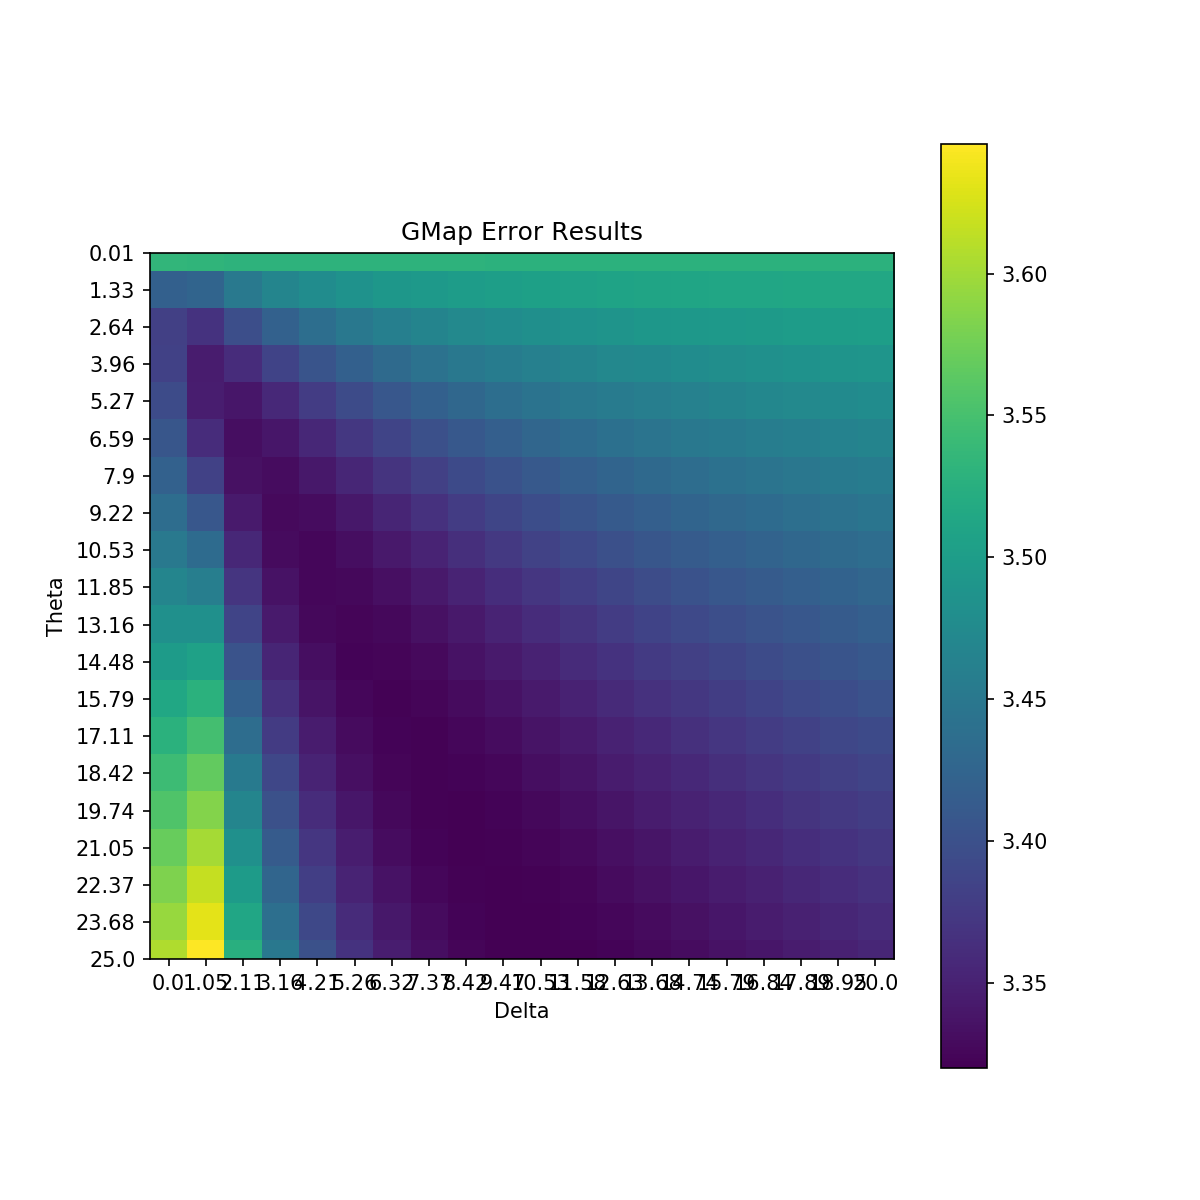

Min SMap Error: 29.4197772561883, Min GMap Error: 27.658652645321414
Improvement of GMap: 1.063673550315358


In [168]:
d = 20
thetas = np.linspace(0.01,25,num=d)
deltas = np.linspace(0,20,num=d)

thetaB, deltaB, errMap = GMapOptimize(X, Y, tx,thetas, deltas)

<IPython.core.display.Javascript object>


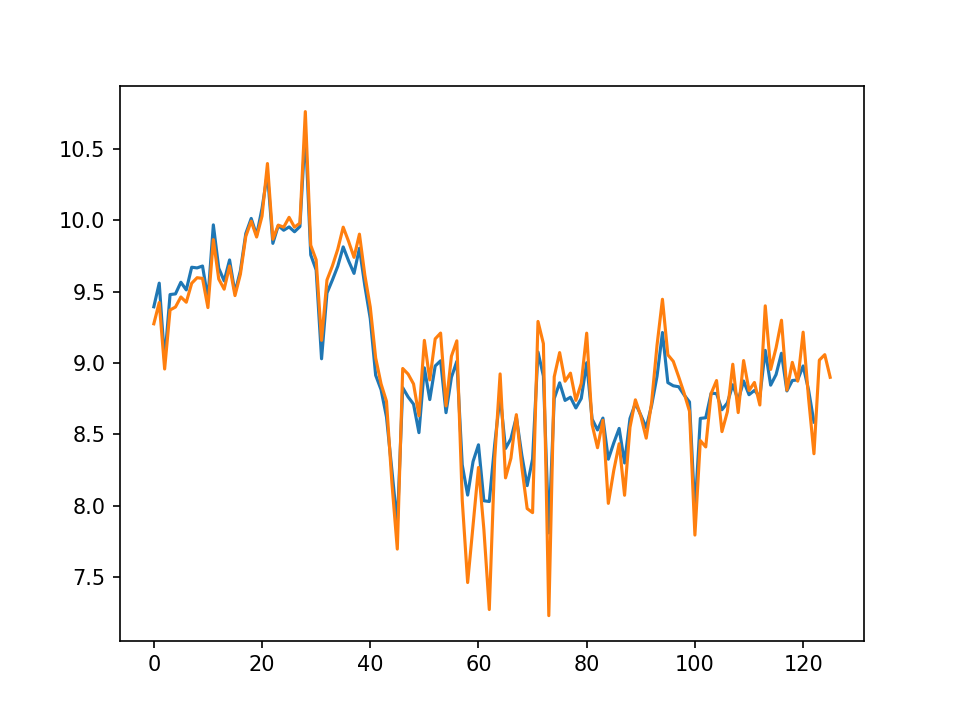

In [169]:
pred = leaveOneOut(X, Y, tx, thetaB, deltaB)

fig, ax = plt.subplots(1)
ax.plot(pred[3:])

ax.plot(Y)

In [166]:
print(thetaB, deltaB)

25.0 9.473684210526315


In [152]:
print(np.ptp(tx))

0.96875


In [207]:
# Plot Function Surface

# Parameters
theta = thetaB
delta = deltaB
currentTime = 0.75

# Create Function Surface
res = 500
r = np.linspace(7, 11, num=res)
T = np.linspace(0,1,num=res)
A, B = np.meshgrid(r,T)
C = np.zeros((res,res))
for i in range(res):
    for j in range(res):
        C[i,j] = GMap(X, Y, tx, A[i,j], B[i,j], theta, delta)


<IPython.core.display.Javascript object>


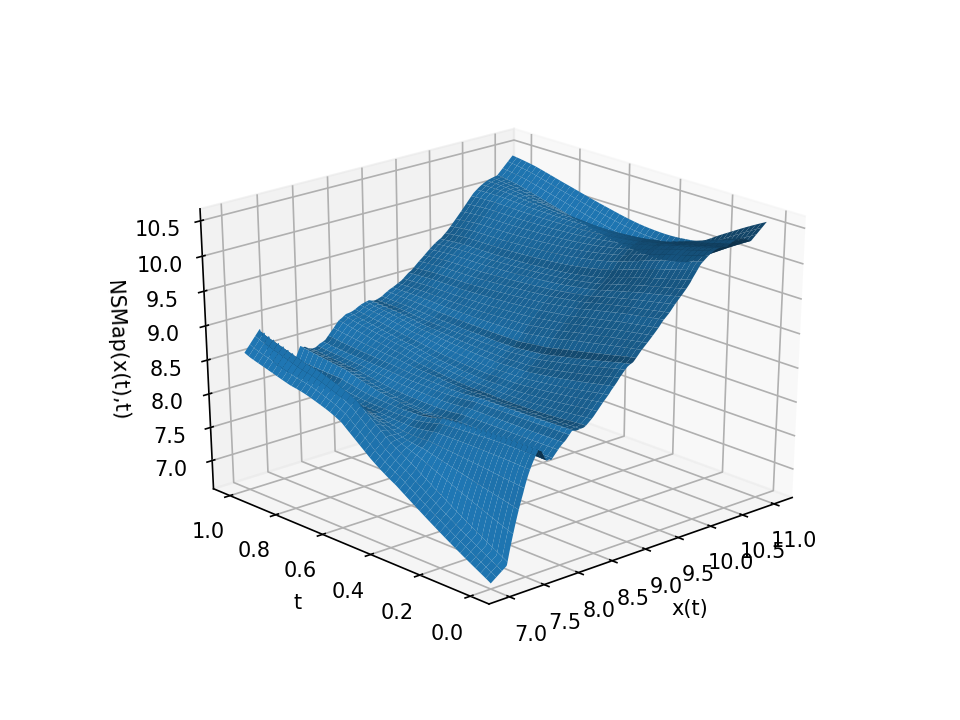

In [208]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.plot_surface(A, B, C)
ax.set_xlabel("x(t)")
ax.set_ylabel("t")
ax.set_zlabel("NSMap(x(t),t)")

plt.show()

In [197]:
# Plot Function Graph

# Plot Function Surface

# Parameters
theta = thetaB
delta = 0
currentTime = 0.5

# Create Function Surface
res = 500
r = np.linspace(7, 11, num=res)
N = np.zeros(res)
for i in range(res):
    N[i] = GMap(X, Y, tx, r[i], currentTime, theta, delta)

<IPython.core.display.Javascript object>


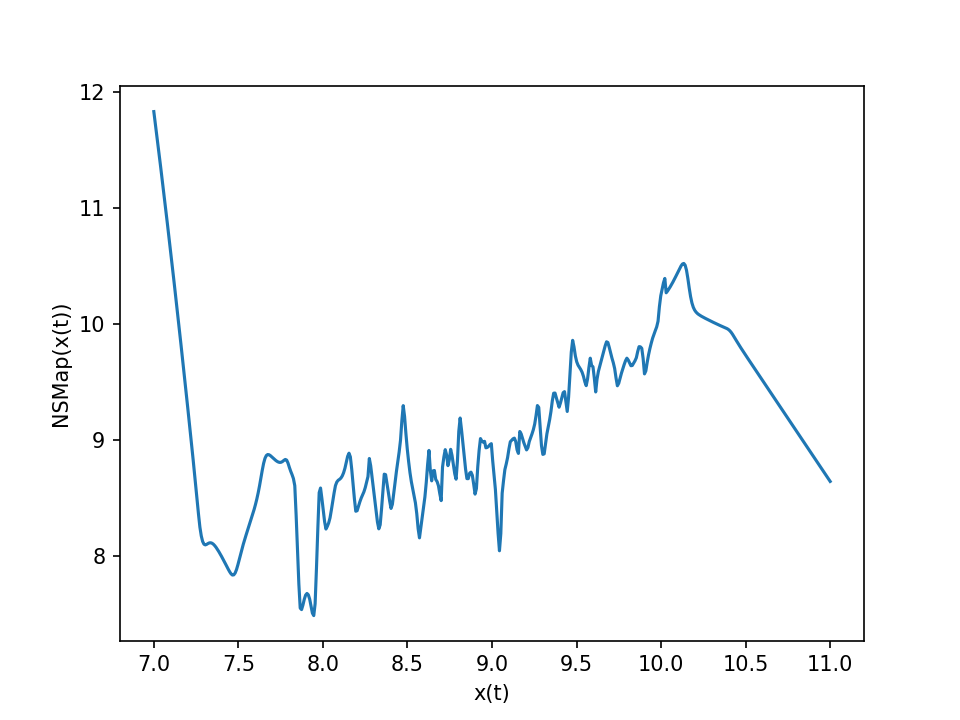

In [198]:
fig, ax = plt.subplots(1)
ax.plot(r, N)
ax.set_xlabel("x(t)")
ax.set_ylabel("NSMap(x(t))")
plt.show()